In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.shape

(1338, 7)

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

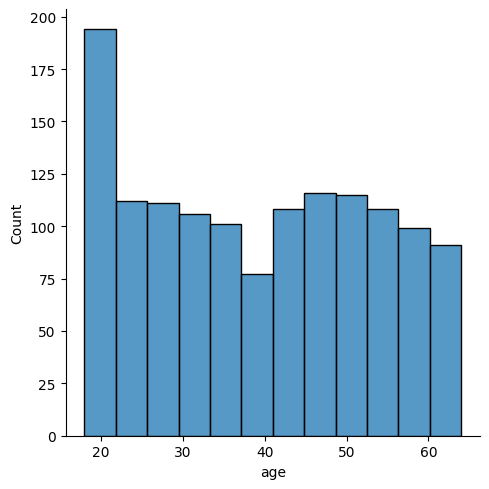

In [10]:
import seaborn as sns
sns.displot(data['age'])

sex
male      676
female    662
Name: count, dtype: int64


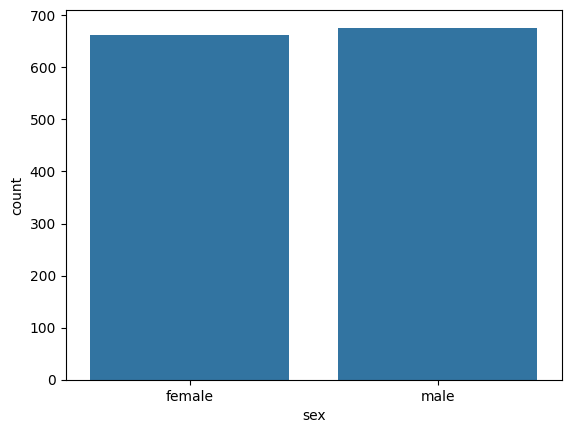

In [11]:
sns.countplot(x = 'sex', data = data)
print(data['sex'].value_counts())

<Axes: xlabel='bmi', ylabel='Count'>

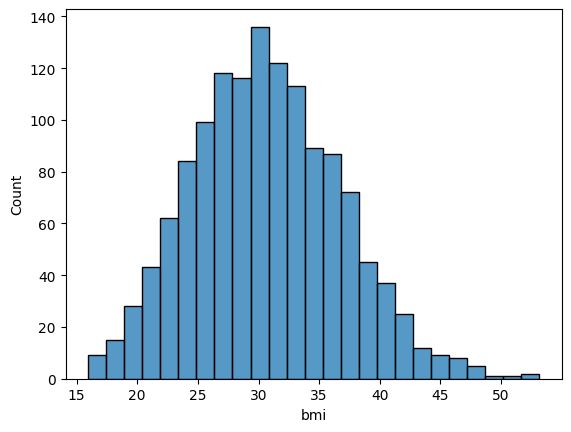

In [12]:
sns.histplot(data['bmi'])

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


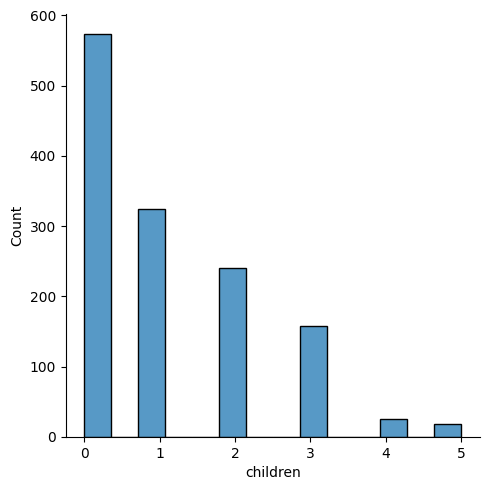

In [13]:
sns.displot(data['children'])
print(data['children'].value_counts())

smoker
no     1064
yes     274
Name: count, dtype: int64


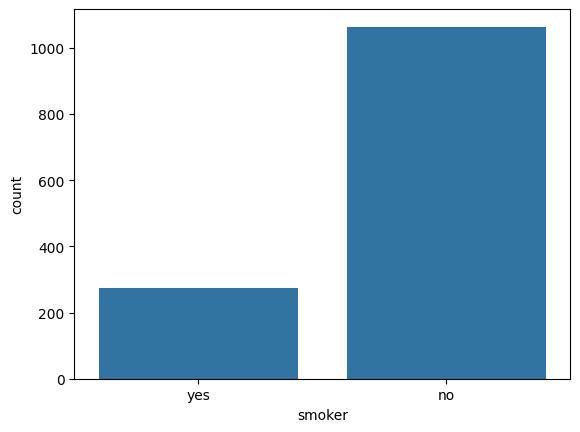

In [14]:
sns.countplot(x = 'smoker', data = data)
print(data['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


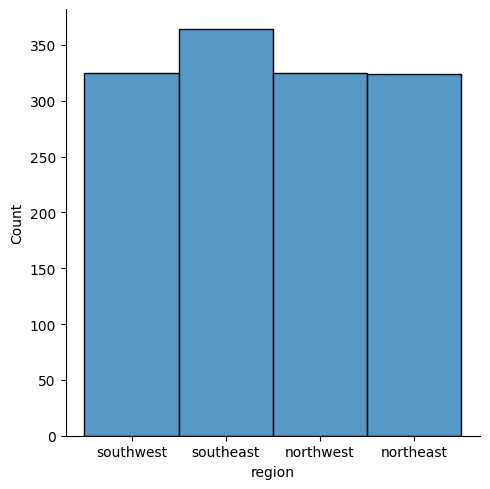

In [15]:
sns.displot(data['region'])
print(data['region'].value_counts())

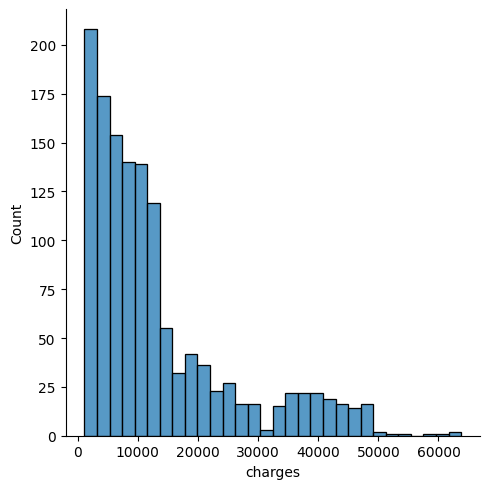

In [16]:
sns.displot(data['charges'])

In [17]:
num = 'age bmi children'.split()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
data[num] = scaler.fit_transform(data[num])
data['charges'] = scaler.fit_transform(data[['charges']])

In [19]:
data

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0.0,yes,southwest,0.251611
1,0.000000,male,0.479150,0.2,no,southeast,0.009636
2,0.217391,male,0.458434,0.6,no,southeast,0.053115
3,0.326087,male,0.181464,0.0,no,northwest,0.333010
4,0.304348,male,0.347592,0.0,no,northwest,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,0.6,no,northwest,0.151299
1334,0.000000,female,0.429379,0.0,no,northeast,0.017305
1335,0.000000,female,0.562012,0.0,no,southeast,0.008108
1336,0.065217,female,0.264730,0.0,no,southwest,0.014144


In [20]:
data = data.replace({'sex': {'female': 1, 'male': 0}, 'smoker': {'yes': 1, 'no': 0}, 'region': {'southeast':0,'southwest':1,'northeast':2,'northwest':3}})

In [21]:
data

,age,sex,bmi,children,smoker,region,charges
0,0.021739,1,0.321227,0.0,1,1,0.251611
1,0.000000,0,0.479150,0.2,0,0,0.009636
2,0.217391,0,0.458434,0.6,0,0,0.053115
3,0.326087,0,0.181464,0.0,0,3,0.333010
4,0.304348,0,0.347592,0.0,0,3,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,0,0.403820,0.6,0,3,0.151299
1334,0.000000,1,0.429379,0.0,0,2,0.017305
1335,0.000000,1,0.562012,0.0,0,0,0.008108
1336,0.065217,1,0.264730,0.0,0,1,0.014144


In [22]:
x = data.drop('charges', axis = 1)
y = data['charges']

In [23]:
x

,age,sex,bmi,children,smoker,region
0,0.021739,1,0.321227,0.0,1,1
1,0.000000,0,0.479150,0.2,0,0
2,0.217391,0,0.458434,0.6,0,0
3,0.326087,0,0.181464,0.0,0,3
4,0.304348,0,0.347592,0.0,0,3
...,...,...,...,...,...,...
1333,0.695652,0,0.403820,0.6,0,3
1334,0.000000,1,0.429379,0.0,0,2
1335,0.000000,1,0.562012,0.0,0,0
1336,0.065217,1,0.264730,0.0,0,1


In [24]:
y

0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64

In [25]:
data.std()

age         0.305434
sex          0.50016
bmi         0.164062
children    0.241099
smoker      0.403694
region      1.130888
charges     0.193301
dtype: object

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [28]:
pred = model.predict(x_test)
pred

array([ 1.19322961e-01,  9.75261132e-02,  5.73315038e-01,  1.35587139e-01,
        4.15640576e-01,  1.59405681e-01, -1.22533996e-02,  2.54123667e-01,
       -5.98110737e-03,  1.63628227e-01,  4.35421300e-01,  1.34274800e-01,
        6.53584692e-02,  5.94326366e-01,  6.23787362e-01,  5.73437165e-01,
        2.24045953e-01,  5.54608898e-01,  1.26757919e-01,  4.87293318e-01,
        4.78956889e-02,  1.47925305e-01,  2.43553627e-02,  8.98699061e-02,
        1.64949179e-01,  1.82840290e-01,  2.17715483e-01,  8.29302201e-02,
        1.35137572e-01,  1.62218149e-02,  1.31750898e-01,  1.93202450e-01,
        5.40840493e-02,  3.93238843e-02,  5.76357443e-02,  1.83810665e-01,
        1.81721420e-02,  1.27010999e-01,  5.16169777e-01,  5.01627586e-01,
        4.87310074e-02,  5.37647250e-02,  2.11820568e-01,  1.67076260e-01,
        1.21164777e-01,  1.79440686e-01,  6.88832671e-02,  3.68167175e-02,
        5.47912087e-01,  1.27093113e-01,  2.33776299e-01,  1.88492271e-02,
        1.81633736e-01,  

In [29]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))
print(mean_absolute_error(y_test, pred))

0.783021587162344
0.008582671375494155
0.06688454745149608


In [30]:
pred.mean()

0.1927374493121349

In [31]:
y.mean()

0.19391586186986068